<a href="https://colab.research.google.com/github/arhammehta/SalaryPrediction/blob/main/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Salary Prediction using Regression Techniques**



## **Importing Libraries**

---

In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load the training features, training salaries and test_features
train_data = pd.read_csv('train_features.csv')
train_output = pd.read_csv('train_salaries.csv')
df1 = train_data.set_index('jobId')
df2 = train_output.set_index('jobId')
#frames = [df1, df2]
#result = pd.concat(frames)

In [3]:
#Load test features in a dataframe with jobId as the index
test_data = pd.read_csv('test_features.csv', index_col='jobId')

## **Exploratory Data Analysis**

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [5]:
train_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, JOB1362685407687 to JOB1362686407686
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   companyId            1000000 non-null  object
 1   jobType              1000000 non-null  object
 2   degree               1000000 non-null  object
 3   major                1000000 non-null  object
 4   industry             1000000 non-null  object
 5   yearsExperience      1000000 non-null  int64 
 6   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 61.0+ MB


# **Checking for Missing and Null values**


In [7]:
train_data.isnull().sum(axis = 0)

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [8]:
train_output.isnull().sum(axis = 0)

jobId     0
salary    0
dtype: int64

In [9]:
test_data.isnull().sum(axis = 0)

companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

# **Finding Insights from Data**

In [10]:
train_data.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [11]:
test_data.head(5)

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
jobId,,,,,,,
JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [12]:
train_output.head(5)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [13]:
train_data.nunique(axis=0)

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

In [14]:
test_data.nunique(axis=0)

companyId               63
jobType                  8
degree                   5
major                    9
industry                 7
yearsExperience         25
milesFromMetropolis    100
dtype: int64

In [15]:
train_output.nunique(axis=0)

jobId     1000000
salary        280
dtype: int64

In [16]:
train_data.companyId.value_counts().sort_values(ascending=True).head(20)

COMP57    15635
COMP8     15638
COMP2     15641
COMP0     15666
COMP17    15715
COMP52    15737
COMP26    15750
COMP29    15754
COMP31    15756
COMP7     15767
COMP55    15767
COMP27    15773
COMP53    15776
COMP49    15779
COMP12    15783
COMP16    15783
COMP50    15791
COMP28    15794
COMP47    15796
COMP5     15798
Name: companyId, dtype: int64

In [17]:
test_data.companyId.value_counts().sort_values(ascending=True).head(20)

COMP17    15595
COMP15    15611
COMP14    15638
COMP37    15644
COMP28    15670
COMP6     15684
COMP25    15698
COMP38    15707
COMP24    15717
COMP59    15720
COMP51    15726
COMP45    15752
COMP52    15777
COMP42    15786
COMP43    15787
COMP26    15788
COMP55    15800
COMP50    15802
COMP29    15813
COMP20    15815
Name: companyId, dtype: int64

In [18]:
train_data.companyId.value_counts().sort_values(ascending=True).head(20)

COMP57    15635
COMP8     15638
COMP2     15641
COMP0     15666
COMP17    15715
COMP52    15737
COMP26    15750
COMP29    15754
COMP31    15756
COMP7     15767
COMP55    15767
COMP27    15773
COMP53    15776
COMP49    15779
COMP12    15783
COMP16    15783
COMP50    15791
COMP28    15794
COMP47    15796
COMP5     15798
Name: companyId, dtype: int64

In [19]:
train_data.jobType.value_counts().sort_values()

CFO               124369
JUNIOR            124594
CEO               124778
JANITOR           124971
CTO               125046
MANAGER           125121
VICE_PRESIDENT    125235
SENIOR            125886
Name: jobType, dtype: int64

In [20]:
test_data.jobType.value_counts().sort_values()

MANAGER           124391
CTO               124665
CEO               124941
JUNIOR            125022
CFO               125092
SENIOR            125202
JANITOR           125253
VICE_PRESIDENT    125434
Name: jobType, dtype: int64

In [21]:
train_data.degree.value_counts().sort_values()

MASTERS        175311
DOCTORAL       175364
BACHELORS      175495
NONE           236854
HIGH_SCHOOL    236976
Name: degree, dtype: int64

In [22]:
test_data.degree.value_counts().sort_values()

BACHELORS      173937
DOCTORAL       175105
MASTERS        175236
NONE           237467
HIGH_SCHOOL    238255
Name: degree, dtype: int64

In [23]:
train_data.major.value_counts().sort_values()

MATH            57801
BIOLOGY         58379
COMPSCI         58382
PHYSICS         58410
BUSINESS        58518
ENGINEERING     58596
LITERATURE      58684
CHEMISTRY       58875
NONE           532355
Name: major, dtype: int64

In [24]:
test_data.major.value_counts().sort_values()

MATH            57817
BUSINESS        57961
LITERATURE      58062
CHEMISTRY       58159
PHYSICS         58248
COMPSCI         58385
ENGINEERING     58496
BIOLOGY         58804
NONE           534068
Name: major, dtype: int64

In [25]:
train_data.industry.value_counts().sort_values()

SERVICE      142639
HEALTH       142755
OIL          142771
EDUCATION    142819
FINANCE      142867
AUTO         142943
WEB          143206
Name: industry, dtype: int64

In [26]:
test_data.industry.value_counts().sort_values()

AUTO         142482
OIL          142535
EDUCATION    142731
HEALTH       142978
WEB          143012
FINANCE      143101
SERVICE      143161
Name: industry, dtype: int64

In [27]:
train_data.yearsExperience.value_counts().sort_values()

12    39467
21    39759
13    39826
14    39827
0     39839
24    39860
19    39860
16    39873
11    39949
20    39988
5     40013
23    40015
10    40032
4     40036
2     40045
7     40047
17    40072
18    40089
6     40095
8     40118
22    40187
3     40191
9     40235
1     40265
15    40312
Name: yearsExperience, dtype: int64

In [28]:
test_data.yearsExperience.value_counts().sort_values()

9     39720
3     39725
18    39737
10    39746
11    39802
5     39832
0     39853
13    39892
4     39945
14    39951
12    39973
22    40018
19    40028
21    40034
16    40045
24    40051
17    40060
23    40084
15    40094
1     40152
2     40174
8     40180
20    40190
6     40311
7     40403
Name: yearsExperience, dtype: int64

In [29]:
train_data.milesFromMetropolis.value_counts().sort_values()

20     9807
87     9815
18     9824
6      9840
26     9845
      ...  
41    10147
97    10155
63    10159
62    10175
99    10180
Name: milesFromMetropolis, Length: 100, dtype: int64

In [30]:
test_data.milesFromMetropolis.value_counts().sort_values()

18     9755
83     9788
65     9789
38     9796
59     9813
      ...  
2     10177
61    10191
95    10205
36    10213
80    10261
Name: milesFromMetropolis, Length: 100, dtype: int64

In [31]:
train_output.salary.value_counts().sort_values()

298        1
17         1
290        1
292        2
294        2
       ...  
104    10297
112    10361
107    10371
114    10407
108    10467
Name: salary, Length: 280, dtype: int64

# **Concatenated train features and train salaries**

---

Concatenation was done on jobId Axis for further exploration and transformation since it was the common column, and did not want to duplicate the efforts of tranforming the data seperately and twice by not doing so.



In [32]:
result = pd.concat([df1, df2], axis=1, join="inner")

In [33]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, JOB1362684407687 to JOB1362685407686
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   companyId            1000000 non-null  object
 1   jobType              1000000 non-null  object
 2   degree               1000000 non-null  object
 3   major                1000000 non-null  object
 4   industry             1000000 non-null  object
 5   yearsExperience      1000000 non-null  int64 
 6   milesFromMetropolis  1000000 non-null  int64 
 7   salary               1000000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 108.7+ MB


In [34]:
result.head(5)

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [35]:
#result['companyId'] = train_dataset['companyId'].str.lstrip('COMP')
X = result.iloc[:,:]

In [36]:
T = test_data.iloc[:,:]

# **Label Encoding all the categorical variables**


---
Used LabelEncoder to label the categorical variables. One label econding will assign the values to the training data features. The same instance will then be used to fit the test features data (only fit, and not fit_transform since it cannot have different values for the same variable value such as company name) finding correlation of features and further analysis


In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:,0] = label_encoder.fit_transform(X.iloc[:,0]).astype('float64')

In [38]:
T.iloc[:,0] = label_encoder.transform(T.iloc[:,0]).astype('float64')

In [39]:
X

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,31.0,CFO,MASTERS,MATH,HEALTH,10,83,130
JOB1362684407688,11.0,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
JOB1362684407689,48.0,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
JOB1362684407690,32.0,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
JOB1362684407691,60.0,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...
JOB1362685407682,52.0,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
JOB1362685407683,17.0,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
JOB1362685407684,16.0,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64


In [40]:
T

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
jobId,,,,,,,
JOB1362685407687,27.0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
JOB1362685407688,5.0,JUNIOR,NONE,NONE,AUTO,20,47
JOB1362685407689,2.0,CTO,MASTERS,BIOLOGY,HEALTH,17,9
JOB1362685407690,14.0,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
JOB1362685407691,30.0,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...,...
JOB1362686407682,50.0,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
JOB1362686407683,45.0,MANAGER,NONE,NONE,HEALTH,20,67
JOB1362686407684,58.0,JANITOR,NONE,NONE,OIL,1,91


In [41]:
label_encoder = LabelEncoder()
X.iloc[:,1] = label_encoder.fit_transform(X.iloc[:,1]).astype('float64')
T.iloc[:,1] = label_encoder.transform(T.iloc[:,1]).astype('float64')

In [42]:
X

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,31.0,1.0,MASTERS,MATH,HEALTH,10,83,130
JOB1362684407688,11.0,0.0,HIGH_SCHOOL,NONE,WEB,3,73,101
JOB1362684407689,48.0,7.0,DOCTORAL,PHYSICS,HEALTH,10,38,137
JOB1362684407690,32.0,5.0,DOCTORAL,CHEMISTRY,AUTO,8,17,142
JOB1362684407691,60.0,7.0,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...
JOB1362685407682,52.0,7.0,BACHELORS,CHEMISTRY,HEALTH,19,94,88
JOB1362685407683,17.0,2.0,HIGH_SCHOOL,NONE,FINANCE,12,35,160
JOB1362685407684,16.0,4.0,HIGH_SCHOOL,NONE,EDUCATION,16,81,64


In [43]:
T

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
jobId,,,,,,,
JOB1362685407687,27.0,5.0,HIGH_SCHOOL,NONE,HEALTH,22,73
JOB1362685407688,5.0,4.0,NONE,NONE,AUTO,20,47
JOB1362685407689,2.0,2.0,MASTERS,BIOLOGY,HEALTH,17,9
JOB1362685407690,14.0,5.0,HIGH_SCHOOL,NONE,OIL,14,96
JOB1362685407691,30.0,4.0,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...,...
JOB1362686407682,50.0,7.0,BACHELORS,MATH,OIL,14,3
JOB1362686407683,45.0,5.0,NONE,NONE,HEALTH,20,67
JOB1362686407684,58.0,3.0,NONE,NONE,OIL,1,91


In [44]:
label_encoder = LabelEncoder()
X.iloc[:,2] = label_encoder.fit_transform(X.iloc[:,2]).astype('float64')
T.iloc[:,2] = label_encoder.transform(T.iloc[:,2]).astype('float64')

In [45]:
X

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,31.0,1.0,3.0,MATH,HEALTH,10,83,130
JOB1362684407688,11.0,0.0,2.0,NONE,WEB,3,73,101
JOB1362684407689,48.0,7.0,1.0,PHYSICS,HEALTH,10,38,137
JOB1362684407690,32.0,5.0,1.0,CHEMISTRY,AUTO,8,17,142
JOB1362684407691,60.0,7.0,0.0,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...
JOB1362685407682,52.0,7.0,0.0,CHEMISTRY,HEALTH,19,94,88
JOB1362685407683,17.0,2.0,2.0,NONE,FINANCE,12,35,160
JOB1362685407684,16.0,4.0,2.0,NONE,EDUCATION,16,81,64


In [46]:
T

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
jobId,,,,,,,
JOB1362685407687,27.0,5.0,2.0,NONE,HEALTH,22,73
JOB1362685407688,5.0,4.0,4.0,NONE,AUTO,20,47
JOB1362685407689,2.0,2.0,3.0,BIOLOGY,HEALTH,17,9
JOB1362685407690,14.0,5.0,2.0,NONE,OIL,14,96
JOB1362685407691,30.0,4.0,1.0,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...,...
JOB1362686407682,50.0,7.0,0.0,MATH,OIL,14,3
JOB1362686407683,45.0,5.0,4.0,NONE,HEALTH,20,67
JOB1362686407684,58.0,3.0,4.0,NONE,OIL,1,91


In [47]:
label_encoder = LabelEncoder()
X.iloc[:,3] = label_encoder.fit_transform(X.iloc[:,3]).astype('float64')
T.iloc[:,3] = label_encoder.transform(T.iloc[:,3]).astype('float64')

In [48]:
label_encoder = LabelEncoder()
X.iloc[:,4] = label_encoder.fit_transform(X.iloc[:,4]).astype('float64')
T.iloc[:,4] = label_encoder.transform(T.iloc[:,4]).astype('float64')

In [49]:
X

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,31.0,1.0,3.0,6.0,3.0,10,83,130
JOB1362684407688,11.0,0.0,2.0,7.0,6.0,3,73,101
JOB1362684407689,48.0,7.0,1.0,8.0,3.0,10,38,137
JOB1362684407690,32.0,5.0,1.0,2.0,0.0,8,17,142
JOB1362684407691,60.0,7.0,0.0,8.0,2.0,8,16,163
...,...,...,...,...,...,...,...,...
JOB1362685407682,52.0,7.0,0.0,2.0,3.0,19,94,88
JOB1362685407683,17.0,2.0,2.0,7.0,2.0,12,35,160
JOB1362685407684,16.0,4.0,2.0,7.0,1.0,16,81,64


In [50]:
T

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
jobId,,,,,,,
JOB1362685407687,27.0,5.0,2.0,7.0,3.0,22,73
JOB1362685407688,5.0,4.0,4.0,7.0,0.0,20,47
JOB1362685407689,2.0,2.0,3.0,0.0,3.0,17,9
JOB1362685407690,14.0,5.0,2.0,7.0,4.0,14,96
JOB1362685407691,30.0,4.0,1.0,0.0,4.0,10,44
...,...,...,...,...,...,...,...
JOB1362686407682,50.0,7.0,0.0,6.0,4.0,14,3
JOB1362686407683,45.0,5.0,4.0,7.0,3.0,20,67
JOB1362686407684,58.0,3.0,4.0,7.0,4.0,1,91


# **Correlation Matrix**


---


To identify if any two features are sharing a co-linear value of more than 0.9, if so then one of the features can be used to prevent training the data on similar set of variables resulting in more bias in the output

In [51]:
corr = X.corr()
corr.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
companyId,1.000000,-0.000284,-0.000057,0.000780,-0.001446,0.001185,-0.001020,-0.000993
jobType,-0.000284,1.000000,-0.020084,-0.020774,0.000069,-0.000186,-0.000365,-0.228673
degree,-0.000057,-0.020084,1.000000,0.370089,0.001551,-0.000144,-0.001359,-0.231789
major,0.000780,-0.020774,0.370089,1.000000,0.001075,0.000012,-0.001369,-0.262430
industry,-0.001446,0.000069,0.001551,0.001075,1.000000,0.000263,-0.000819,0.086502


In [52]:
X

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,31.0,1.0,3.0,6.0,3.0,10,83,130
JOB1362684407688,11.0,0.0,2.0,7.0,6.0,3,73,101
JOB1362684407689,48.0,7.0,1.0,8.0,3.0,10,38,137
JOB1362684407690,32.0,5.0,1.0,2.0,0.0,8,17,142
JOB1362684407691,60.0,7.0,0.0,8.0,2.0,8,16,163
...,...,...,...,...,...,...,...,...
JOB1362685407682,52.0,7.0,0.0,2.0,3.0,19,94,88
JOB1362685407683,17.0,2.0,2.0,7.0,2.0,12,35,160
JOB1362685407684,16.0,4.0,2.0,7.0,1.0,16,81,64


# **Dropping jobId columns**
---


Reduces the number of features used to build the model on the datasets reducing the model training time and saving consumption cost of the resources

In [53]:
X.reset_index(drop=True, inplace=True)
T.reset_index(drop=True, inplace=True)

In [54]:
X

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,31.0,1.0,3.0,6.0,3.0,10,83,130
1,11.0,0.0,2.0,7.0,6.0,3,73,101
2,48.0,7.0,1.0,8.0,3.0,10,38,137
3,32.0,5.0,1.0,2.0,0.0,8,17,142
4,60.0,7.0,0.0,8.0,2.0,8,16,163
...,...,...,...,...,...,...,...,...
999995,52.0,7.0,0.0,2.0,3.0,19,94,88
999996,17.0,2.0,2.0,7.0,2.0,12,35,160
999997,16.0,4.0,2.0,7.0,1.0,16,81,64
999998,23.0,1.0,3.0,7.0,3.0,6,5,149


In [55]:
T

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,27.0,5.0,2.0,7.0,3.0,22,73
1,5.0,4.0,4.0,7.0,0.0,20,47
2,2.0,2.0,3.0,0.0,3.0,17,9
3,14.0,5.0,2.0,7.0,4.0,14,96
4,30.0,4.0,1.0,0.0,4.0,10,44
...,...,...,...,...,...,...,...
999995,50.0,7.0,0.0,6.0,4.0,14,3
999996,45.0,5.0,4.0,7.0,3.0,20,67
999997,58.0,3.0,4.0,7.0,4.0,1,91
999998,11.0,2.0,1.0,6.0,4.0,14,63


In [56]:
y = X.iloc[:,-1]
X = X.iloc[:,:-1]

In [57]:
X

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,31.0,1.0,3.0,6.0,3.0,10,83
1,11.0,0.0,2.0,7.0,6.0,3,73
2,48.0,7.0,1.0,8.0,3.0,10,38
3,32.0,5.0,1.0,2.0,0.0,8,17
4,60.0,7.0,0.0,8.0,2.0,8,16
...,...,...,...,...,...,...,...
999995,52.0,7.0,0.0,2.0,3.0,19,94
999996,17.0,2.0,2.0,7.0,2.0,12,35
999997,16.0,4.0,2.0,7.0,1.0,16,81
999998,23.0,1.0,3.0,7.0,3.0,6,5


In [58]:
y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

# **Feature Importance**

---
Finding the impact of independent variables on dependent variables i.e how much does each feature impact the salary of an employee

Created a Subset of the entire training data, as the session was crashing due to limited RAM availability 

In [59]:
X_sub = X[:10000][:]
y_sub = y[:10000][:]

In [60]:
X_sub

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,31.0,1.0,3.0,6.0,3.0,10,83
1,11.0,0.0,2.0,7.0,6.0,3,73
2,48.0,7.0,1.0,8.0,3.0,10,38
3,32.0,5.0,1.0,2.0,0.0,8,17
4,60.0,7.0,0.0,8.0,2.0,8,16
...,...,...,...,...,...,...,...
9995,40.0,1.0,1.0,7.0,4.0,3,76
9996,9.0,6.0,3.0,0.0,4.0,12,73
9997,15.0,6.0,3.0,7.0,3.0,11,34
9998,26.0,3.0,4.0,7.0,2.0,21,15


In [61]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_sub,y_sub)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [62]:
print(model.feature_importances_)

[0.06244714 0.31454616 0.07265274 0.09874154 0.09761811 0.19753252
 0.15646179]


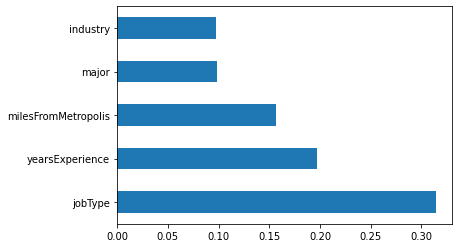

In [63]:
feat_importances = pd.Series(model.feature_importances_, index=X_sub.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# **Splitting training data into train and test sets**


---

Split the dataset with 85% of the total data for training the model and 15% of the data for testing the models. Usually, I keep 80/20 split but since there was a large dataset, I reduced the split for better model building. Increasing it more could lead to over-fitting and that's why it was avoided.

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850000 entries, 467798 to 128037
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   companyId            850000 non-null  float64
 1   jobType              850000 non-null  float64
 2   degree               850000 non-null  float64
 3   major                850000 non-null  float64
 4   industry             850000 non-null  float64
 5   yearsExperience      850000 non-null  int64  
 6   milesFromMetropolis  850000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 51.9 MB


**Data Standardisation**



---

Converted the two features - yearsExperience and milesFromMetropolis into a range of smaller values for better model building.

In [66]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, -2:] = sc.fit_transform(X_train[:, -2:])
X_test[:, -2:] = sc.transform(X_test[:, -2:])

In [67]:
T = T.to_numpy()
T[:, -2:] = sc.transform(T[:, -2:])

In [68]:
X_train

array([[ 1.80000000e+01,  7.00000000e+00,  4.00000000e+00, ...,
         0.00000000e+00, -8.30627211e-01, -1.26455720e+00],
       [ 5.00000000e+01,  7.00000000e+00,  0.00000000e+00, ...,
         4.00000000e+00, -2.75984829e-01,  2.93387553e-01],
       [ 1.60000000e+01,  6.00000000e+00,  4.00000000e+00, ...,
         6.00000000e+00, -1.37324234e-01,  1.64195972e-02],
       ...,
       [ 2.60000000e+01,  6.00000000e+00,  4.00000000e+00, ...,
         4.00000000e+00,  4.17318148e-01, -1.22064381e-01],
       [ 5.50000000e+01,  6.00000000e+00,  4.00000000e+00, ...,
         2.00000000e+00, -9.69287806e-01, -1.43766217e+00],
       [ 4.50000000e+01,  1.00000000e+00,  4.00000000e+00, ...,
         5.00000000e+00, -1.52393019e+00, -7.79863275e-01]])

# **Machine Learning Models**


---

Trained the dataset onto different Regression techniques such as Linear Regression, Decision Tree, Random Forest and XGBoost. Calculated the root mean square errors based on the predicted values of salaries and r2 score for all the models. 

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
y_pred = lr.predict(X_test)
np.set_printoptions(precision=0)

In [71]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 90.  64.]
 [137. 176.]
 [114. 128.]
 ...
 [116. 107.]
 [ 93.  89.]
 [154. 134.]]


In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3833571367342563

In [73]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))

30.40442236899153


In [74]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [75]:
y_pred = dt.predict(X_test)
np.set_printoptions(precision=2)

In [76]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 53.   64. ]
 [132.  176. ]
 [131.5 128. ]
 ...
 [137.  107. ]
 [119.   89. ]
 [190.  134. ]]


In [77]:
r2_score(y_test, y_pred)

0.49578440425003223

In [78]:
mse=mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))

27.493373972784923


In [79]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [80]:
y_pred = rf.predict(X_test)
np.set_printoptions(precision=2)

In [81]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 61.22  64.  ]
 [162.06 176.  ]
 [137.29 128.  ]
 ...
 [119.24 107.  ]
 [ 99.14  89.  ]
 [164.27 134.  ]]


In [82]:
r2_score(y_test, y_pred)

0.7270928358469259

In [83]:
mse=mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))

20.226808861878766


In [84]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[01:49:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [85]:
y_pred = xgb.predict(X_test)
np.set_printoptions(precision=2)

In [86]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 68.51  64.  ]
 [149.16 176.  ]
 [136.31 128.  ]
 ...
 [123.01 107.  ]
 [ 92.1   89.  ]
 [164.57 134.  ]]


In [87]:
r2_score(y_test, y_pred)

0.7416185512845839

In [88]:
mse=mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))

19.681154321239624


# **Hyperparameter Tuning**


---
Using Randomized Search for Hyperparameter tuning of the XGBoost Model. Gave the SearchCv model a bunch of parameters with different sets of ranges. Provided ranges with significant differences to generate optimal results faster. Better than randomly tuning parameters, since it only checks within the listed values saving iterations. It only prevents checking similar values, and checks for set values passed. Algo is used to find the best parameters for the model that gives the best score. The model was fitted on 5 fold for 3 iterations resulting in a total of 15 fits. Used n_jobs as -1 to optimise the RAM space used as jobs take place in parallel with this input.

In [89]:
from sklearn.model_selection import RandomizedSearchCV

params={'n_estimators' : [100],
       'max_depth': [3,4,5,7,10,14,18],
       'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
       'gamma' : [0.0,0.1,0.2,0.3,0.4,0.5],
       'min_child_weight' : [1,2,3,4,5,7,9,10],
       'colsample_bytree' : [0.3,0.4,0.5,0.6,0.7]}

search = RandomizedSearchCV(estimator = xgb, 
                            param_distributions=params, 
                            random_state=42, 
                            n_iter=3, 
                            cv=5,
                            verbose=3, 
                            n_jobs=-1, 
                            return_train_score=True)
search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 20.5min finished


[02:10:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=3, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                 

In [90]:
search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.2,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [91]:
search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 100}

# **Final Model**



---
Trained the XGBoost model on the final set of parameters as returned as an output of hyperparameter tuning. Used, the whole training features and training salaries data to fit the model to get better results

In [92]:
xgb_tuned = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.2,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_tuned.fit(X_train,y_train)

[02:11:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.2,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [93]:
y_pred = xgb_tuned.predict(X_test)

In [94]:
r2_score(y_test, y_pred)

0.7565045334016857

In [95]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 15.48524865568161
MSE: 365.0317868774609
RMSE: 19.105805057035962


# **Prediction of Salary for the test dataset**

---
Predicting the salary values for the Test features given on the trained model


In [96]:
y_pred = xgb.predict(T)

In [97]:
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

In [98]:
y_pred

array([109,  95, 173, ...,  56, 152, 107])

In [99]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('test_features.csv')
test_salaries = pd.concat([sub_df['jobId'],pred],axis=1)
test_salaries.columns=['jobId','salary']

In [100]:
test_salaries

,jobId,salary
0,JOB1362685407687,109
1,JOB1362685407688,95
2,JOB1362685407689,173
3,JOB1362685407690,101
4,JOB1362685407691,119
...,...,...
999995,JOB1362686407682,162
999996,JOB1362686407683,108
999997,JOB1362686407684,56
999998,JOB1362686407685,152


# **Submission File**

In [101]:
test_salaries.to_csv('test_salaries.csv',index=False)